In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving 50_Startups.csv to 50_Startups (3).csv


In [ ]:
data=pd.read_csv('50_Startups.csv')

In [ ]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [ ]:
data=data.rename({'R&D Spend':'RDSpend','Marketing Spend':'Marketing_Spend'},axis=1)
data.head()

,RDSpend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#Scatterplot between variables along with histograms

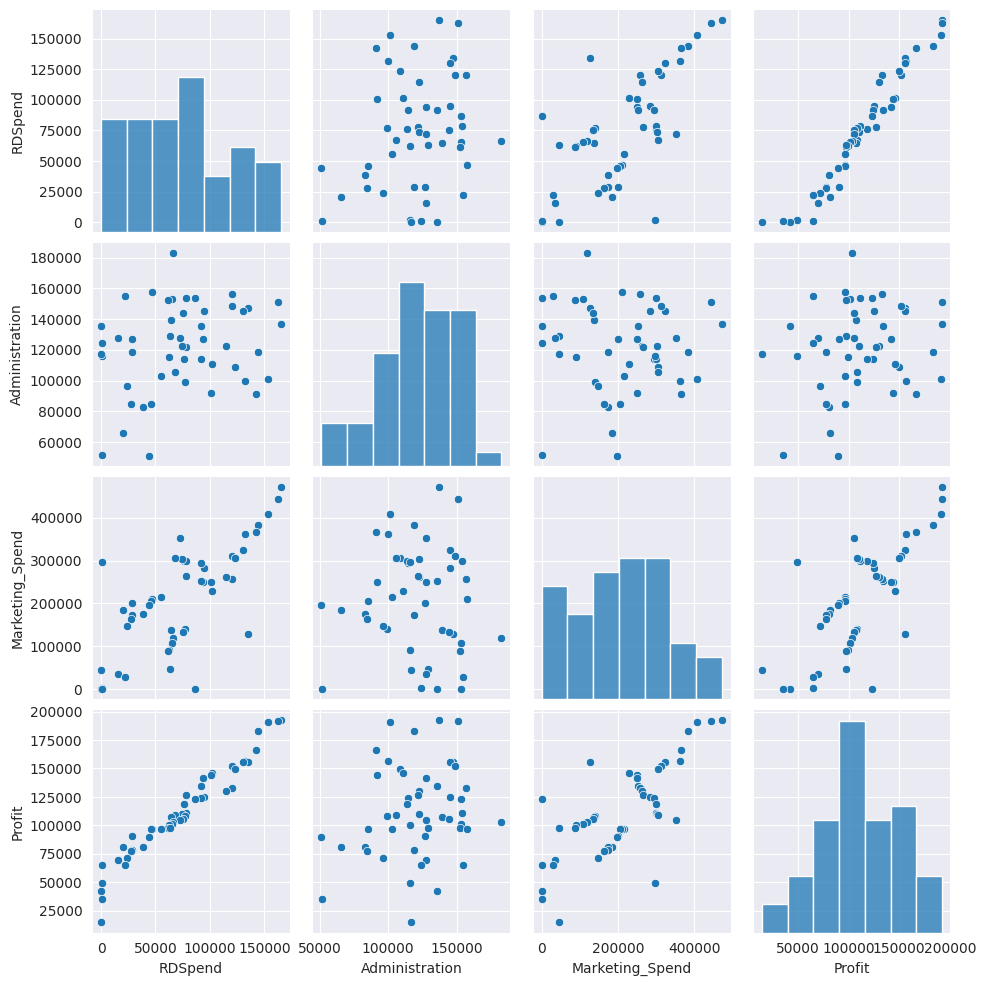

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

#preparing a model

In [ ]:
model=smf.ols('Profit~ RDSpend+Administration+Marketing_Spend',data=data).fit()

In [ ]:
model.params

Intercept          50122.192990
RDSpend                0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

#interpreting the Beta Coefficients

In [ ]:
model.fittedvalues

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [ ]:
data['Predictions_Model']=model.fittedvalues

In [ ]:
data['Errors_Model']=model.resid

In [ ]:
data.head()

,RDSpend,Administration,Marketing_Spend,State,Profit,Predictions_Model,Errors_Model
0,165349.20,136897.80,471784.10,New York,192261.83,192521.252890,-259.422890
1,162597.70,151377.59,443898.53,California,191792.06,189156.768232,2635.291768
2,153441.51,101145.55,407934.54,Florida,191050.39,182147.279096,8903.110904
3,144372.41,118671.85,383199.62,New York,182901.99,173696.700026,9205.289974
4,142107.34,91391.77,366168.42,Florida,166187.94,172139.514183,-5951.574183


In [ ]:
print(model.tvalues,'\n',model.pvalues)

Intercept           7.626218
RDSpend            17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 
 Intercept          1.057379e-09
RDSpend            2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


In [ ]:
model.pvalues

Intercept          1.057379e-09
RDSpend            2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64

In [ ]:
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

#calculating VIF(variance inflation Factor)

In [ ]:
rsq_RD= smf.ols('RDSpend~Administration+Marketing_Spend',data=data).fit().rsquared_adj
vif_RD = 1/(1-rsq_RD)

rsq_admin= smf.ols('Administration~RDSpend+Marketing_Spend',data=data).fit().rsquared_adj
vif_admin = 1/(1-rsq_admin)

rsq_Marketing_Spend= smf.ols('Marketing_Spend~Administration+RDSpend',data=data).fit().rsquared_adj
vif_Marketing_Spend = 1/(1-rsq_admin)

d1={'variables':['RDSpend','Administration','Marketing_Spend'],'VIF':[vif_RD ,vif_admin,vif_Marketing_Spend]}
vif_frame=pd.DataFrame(d1)
vif_frame



,variables,VIF
0,RDSpend,2.368132
1,Administration,1.127128
2,Marketing_Spend,1.127128


#Residual Analysis

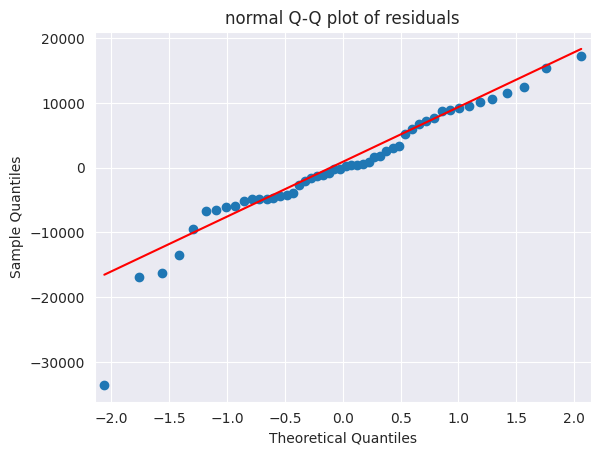

In [ ]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45])]

<Axes: >

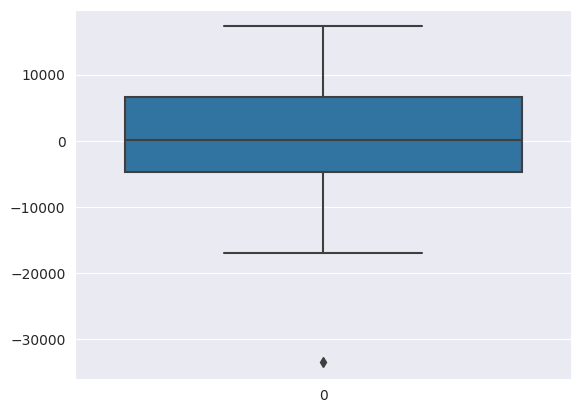

In [ ]:
sns.boxplot(model.resid)

<Axes: xlabel='Errors_Model', ylabel='Density'>

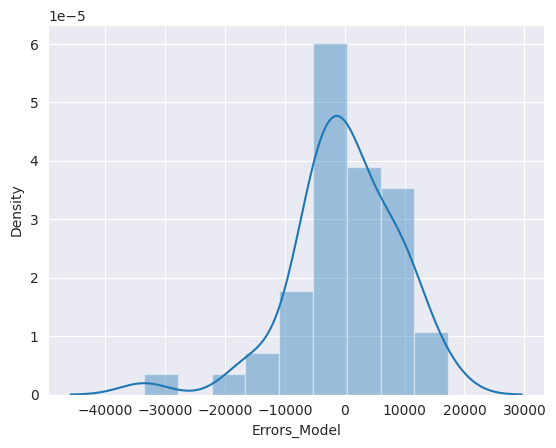

In [ ]:
sns.distplot(data['Errors_Model'])

#Residual plot for Homoscedasticity

In [ ]:
def get_standardized_values(vals):
  return(vals-vals.mean())/vals.std()

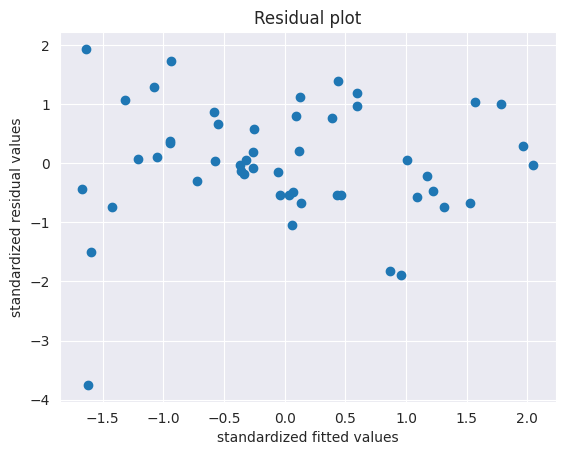

In [ ]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()


In [ ]:
get_standardized_values(model.resid).mean()

-2.6645352591003756e-17